<a href="https://colab.research.google.com/github/Chaqmoqjon/Machine-Learning/blob/main/Amaliyot_Diabet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##Datani tayyorlash

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/refs/heads/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pregnancies: homilador bo'lish soni

Glucose: glyukozaga test natijasi

BloodPressure: diastolik qon bosimi (mm Hg)

SkinThickness: Triceps teri burmasining qalinligi (mm)

Insulin: 2 soatlik sarum insulini (mu U/ml)

BMI: Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2)

DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi

Age: Yosh (yil)

Outcome: Class (0 - diabet yo'q, 1 - diabet)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df['BMI'][df['BMI'] < 15].value_counts()

,count
BMI,
0.0,11


In [ ]:
df['BMI'] = df['BMI'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum() / len(df) * 100

,0
Pregnancies,0.000000
Glucose,0.651042
BloodPressure,4.557292
SkinThickness,29.557292
Insulin,48.697917
BMI,1.432292
DiabetesPedigreeFunction,0.000000
Age,0.000000
Outcome,0.000000


In [ ]:
df.corrwith(df['Outcome']).sort_values(ascending=False)

,0
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


In [ ]:
df.drop(['SkinThickness', 'Insulin', 'BloodPressure'], axis=1, inplace=True)

In [ ]:
df.fillna(df.median(), inplace=True)

In [ ]:
df.corrwith(df['Outcome']).sort_values(ascending=False)

,0
Outcome,1.000000
Glucose,0.492782
BMI,0.312038
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844


#ML

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

##Normalizatsiya

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Eng yaxshi "neighbors" ni topish

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
param_grid = {'n_neighbors': np.arange(1, 25)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
knn_cv.best_params_

{'n_neighbors': 22}

In [ ]:
knn_cv.best_score_

0.7622417699586832

##KNN ni ishlatish

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=22)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=22)

In [ ]:
y_pred = knn_best.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, jaccard_score

In [ ]:
jaccard_score(y_test, y_pred)

0.43661971830985913

In [ ]:
confusion_matrix(y_test, y_pred)

array([[83, 16],
       [24, 31]])

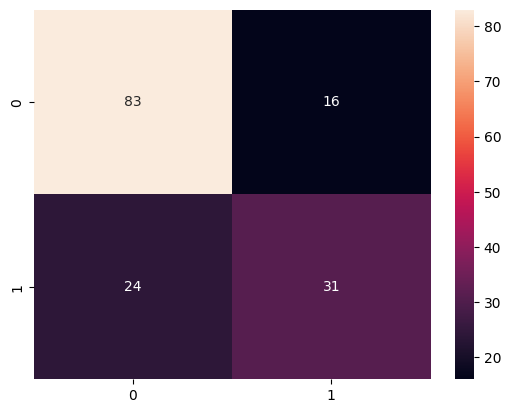

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        99
           1       0.66      0.56      0.61        55

    accuracy                           0.74       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154

